In [32]:
import json
data = []
for line in open("bench_results.json"):
    j = json.loads(line)
    name = ""
    if 'id' in j:
        print(j['id'])
        name = j['id'].split('/')[1]
        ns =  name.split('_') 
        tool = '_'.join(ns[1:])
        div = float(ns[0][1:])
    seq_len = 1000
    if 'typical' in j:
        microseconds = j['typical']['estimate']
        bases_per_nanosecond = seq_len/j['typical']['estimate']
        megabases_per_second = bases_per_nanosecond / 1000000 * 1000000000
        print(megabases_per_second)
        data += [(div,tool, megabases_per_second)]
    #print(json.dumps(j, indent=4))


BenchmarkGroup/d0.01_rust_bio_levenshtein/1000
0.4358852580710847
BenchmarkGroup/d0.01_parasailors/1000
1.0921155499103996
BenchmarkGroup/d0.01_rust_bio_simd_bounded_levenshtein/1000
69.95444630507697
BenchmarkGroup/d0.01_rust_bio_simd_levenshtein/1000
69.28018425290769
BenchmarkGroup/d0.01_block_aligner/1000
44.51381413630153
BenchmarkGroup/d0.01_wfa2/1000
196.49379522062736
BenchmarkGroup/d0.01_ksw2_etz/1000
0.3378809425021937
BenchmarkGroup/d0.01_ksw2_extz2_sse/1000
0.9449177022446389
BenchmarkGroup/d0.025_rust_bio_levenshtein/1000
0.4407123304792936
BenchmarkGroup/d0.025_parasailors/1000
1.1434517906609527
BenchmarkGroup/d0.025_rust_bio_simd_bounded_levenshtein/1000
70.42587009377769
BenchmarkGroup/d0.025_rust_bio_simd_levenshtein/1000
69.27033227918498
BenchmarkGroup/d0.025_block_aligner/1000
44.32371034780802
BenchmarkGroup/d0.025_wfa2/1000
26.560971911254498
BenchmarkGroup/d0.025_ksw2_etz/1000
0.3318833365327507
BenchmarkGroup/d0.025_ksw2_extz2_sse/1000
0.9420213152214071
Benchm

[(0.01, 'rust_bio_levenshtein', 0.4358852580710847), (0.01, 'parasailors', 1.0921155499103996), (0.01, 'rust_bio_simd_bounded_levenshtein', 69.95444630507697), (0.01, 'rust_bio_simd_levenshtein', 69.28018425290769), (0.01, 'block_aligner', 44.51381413630153), (0.01, 'wfa2', 196.49379522062736), (0.01, 'ksw2_etz', 0.3378809425021937), (0.01, 'ksw2_extz2_sse', 0.9449177022446389), (0.025, 'rust_bio_levenshtein', 0.4407123304792936), (0.025, 'parasailors', 1.1434517906609527), (0.025, 'rust_bio_simd_bounded_levenshtein', 70.42587009377769), (0.025, 'rust_bio_simd_levenshtein', 69.27033227918498), (0.025, 'block_aligner', 44.32371034780802), (0.025, 'wfa2', 26.560971911254498), (0.025, 'ksw2_etz', 0.3318833365327507), (0.025, 'ksw2_extz2_sse', 0.9420213152214071), (0.05, 'rust_bio_levenshtein', 0.43914332789098814), (0.05, 'parasailors', 1.2366369418805572), (0.05, 'rust_bio_simd_bounded_levenshtein', 51.85538486741694), (0.05, 'rust_bio_simd_levenshtein', 29.55033322852175), (0.05, 'block

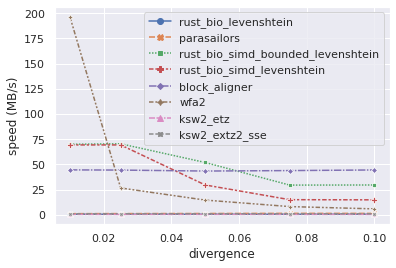

In [56]:
print(data)
import seaborn, pandas
df = pandas.DataFrame(data=data, columns=['divergence', 'tool', 'speed (MB/s)'])
plot = seaborn.lineplot(data=df, x="divergence", y="speed (MB/s)", style="tool", hue="tool",  markers=True)
plot.legend_.set_title(None)
fig = plot.get_figure()
fig.savefig("out.png",dpi=300) 